In [82]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt

In [5]:
BASE_PATH = Path.cwd()
DATA_PATH = BASE_PATH /'data'
MAP_PATH = DATA_PATH / 'map'
CASE_PATH = DATA_PATH / 'case'

In [9]:
case_before_2016 = pd.read_csv(CASE_PATH / 'case_before_2016.csv')

In [52]:
case_after_2016 = pd.read_csv(CASE_PATH / 'case_after_2016.csv')

In [63]:
case_before_2016

,OBJECTID,2013,2014,2015,2016
0,4,22,8,13,18
1,5,3,3,4,6
2,7,5,3,3,1
3,8,7,3,5,5
4,9,9,3,1,5
...,...,...,...,...,...
221,246,6,5,1,8
222,254,3,3,1,4
223,256,1,4,3,3
224,257,7,11,5,5


In [26]:
cm = gpd.read_file('data/map/cnew.json')

In [29]:
cm['Addr_Comm'] = cm['danhTuChun'] + ' ' + cm['diaDanh']

In [31]:
cm['Addr_Comm'] = cm['Addr_Comm'].str.upper()

In [32]:
comm_name = cm[['OBJECTID', 'Addr_Comm']]

In [53]:
case_after_2016['Addr_Comm'] = case_after_2016['Addr_Comm'].apply(lambda x: 'XÃ ' + x if 'PHƯỜNG' not in x and 'THỊ TRẤN' not in x else x)
case_after_2016['Addr_Comm'] = case_after_2016['Addr_Comm'].str.replace('XÃ XÃ', 'XÃ')

In [59]:
case_after_2016_m

,OBJECTID,Addr_Comm,2017,2018,2019,2020,2021,2022
0,220,PHƯỜNG TRẦN TẾ XƯƠNG,13,18,8,15,5,19
1,221,PHƯỜNG VỊ HOÀNG,9,9,11,5,7,6
2,222,PHƯỜNG VỊ XUYÊN,10,7,5,3,2,11
3,223,PHƯỜNG QUANG TRUNG,12,8,12,5,5,2
4,224,PHƯỜNG CỬA BẮC,10,11,8,7,15,9
...,...,...,...,...,...,...,...,...
221,214,XÃ GIAO AN,6,4,7,5,2,6
222,219,PHƯỜNG HẠ LONG,18,13,14,14,5,12
223,88,XÃ PHÚC THẮNG,6,8,10,7,3,2
224,181,XÃ HẢI AN,14,12,10,5,8,10


In [55]:
case_after_2016_m = pd.merge(comm_name, case_after_2016, on='Addr_Comm', how ='left')

In [67]:
total_case = pd.merge(case_before_2016, case_after_2016_m, on=['OBJECTID']).fillna(0)

,OBJECTID,Addr_Comm,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,4,THỊ TRẤN LÂM,22,8,13,18,13,24,14,7,10,11
1,5,XÃ NAM VÂN,3,3,4,6,8,6,3,3,1,3
2,7,THỊ TRẤN MỸ LỘC,5,3,3,1,4,5,2,3,2,3
3,8,XÃ MỸ HÀ,7,3,5,5,7,4,3,1,7,4
4,9,XÃ MỸ TIẾN,9,3,1,5,4,4,0,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
221,246,XÃ MỸ TRUNG,6,5,1,8,7,3,6,1,6,7
222,254,XÃ TÂN THÀNH,3,3,1,4,3,2,3,5,2,2
223,256,XÃ NAM MỸ,1,4,3,3,10,4,3,4,5,5
224,257,XÃ ĐIỀN XÁ,7,11,5,5,7,10,10,3,7,9


In [64]:
other_columns = [col for col in total_case.columns if col not in ['OBJECTID', 'Addr_Comm']]

# Rearrange columns
new_columns_order = ['OBJECTID', 'Addr_Comm'] + other_columns
total_case = total_case[new_columns_order]

In [66]:
#total_case.to_csv(CASE_PATH / 'case_final.csv', encoding='utf-8-sig', index=False)

In [68]:
long_df = pd.melt(total_case, id_vars=['OBJECTID', 'Addr_Comm'], var_name='year', value_name='observed')

In [69]:
long_df

,OBJECTID,Addr_Comm,year,observed
0,4,THỊ TRẤN LÂM,2013,22
1,5,XÃ NAM VÂN,2013,3
2,7,THỊ TRẤN MỸ LỘC,2013,5
3,8,XÃ MỸ HÀ,2013,7
4,9,XÃ MỸ TIẾN,2013,9
...,...,...,...,...
2255,246,XÃ MỸ TRUNG,2022,7
2256,254,XÃ TÂN THÀNH,2022,2
2257,256,XÃ NAM MỸ,2022,5
2258,257,XÃ ĐIỀN XÁ,2022,9


In [70]:
long_cm = pd.merge(cm, long_df, on=['OBJECTID','Addr_Comm'])

In [99]:
long_cm.to_file(MAP_PATH / 'commune_w_case.json', driver='GeoJSON')

In [80]:
gdf = long_cm.copy()

In [90]:
year_data = gdf[gdf['year'] == '2015']

In [92]:
gdf['year'] = gdf['year'].astype(int)

In [94]:
gdf['observed'] = gdf['observed'].astype(int)

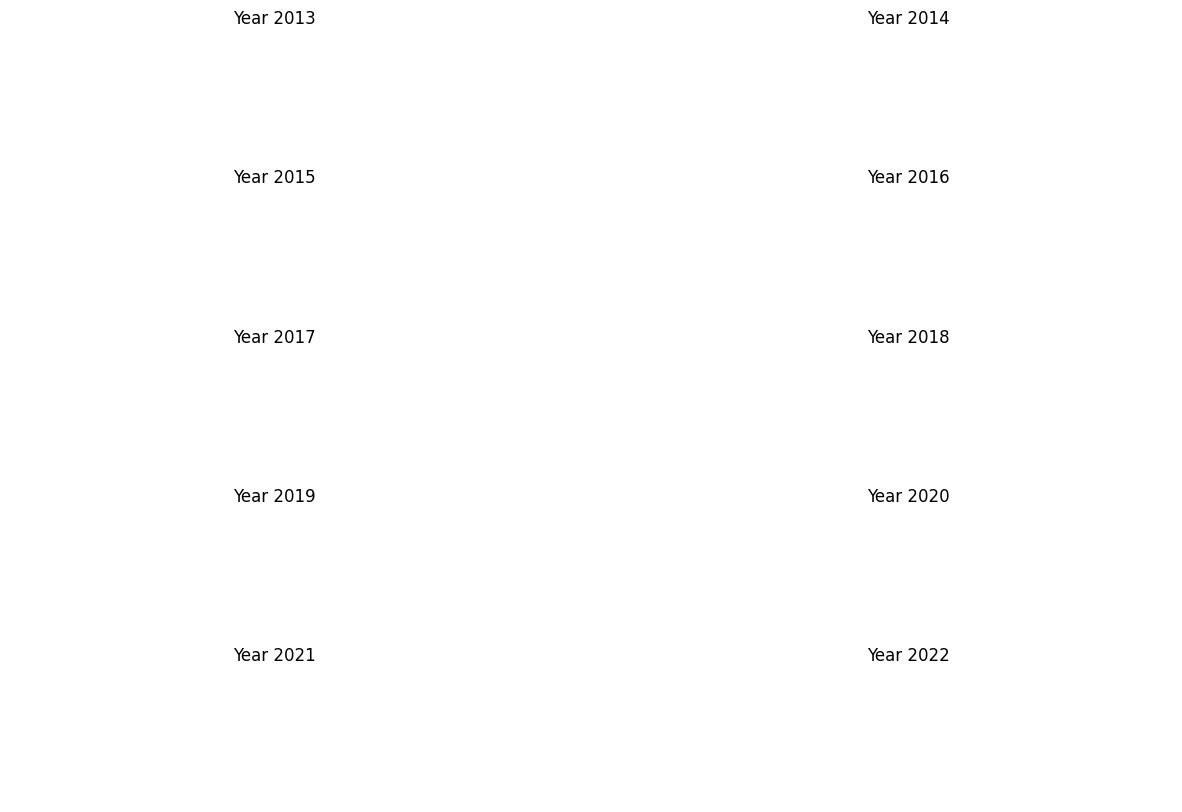

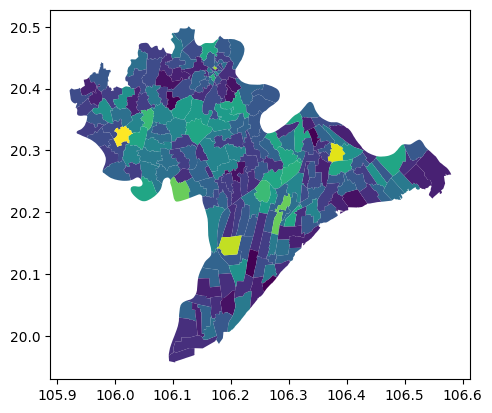

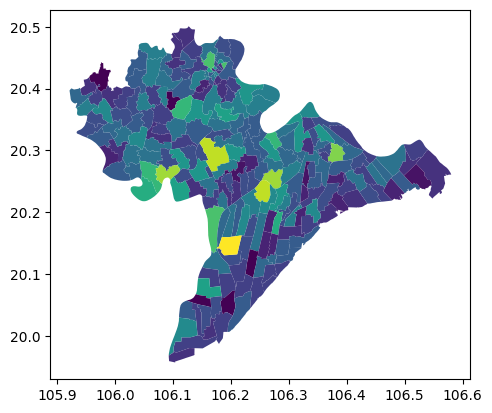

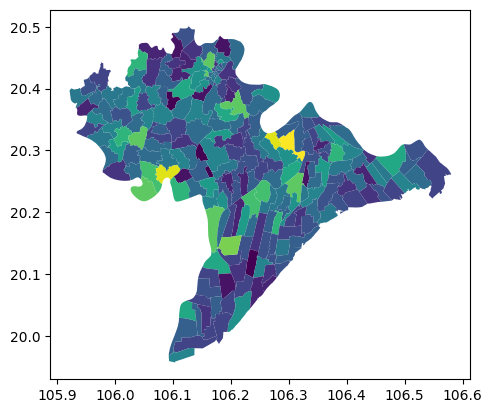

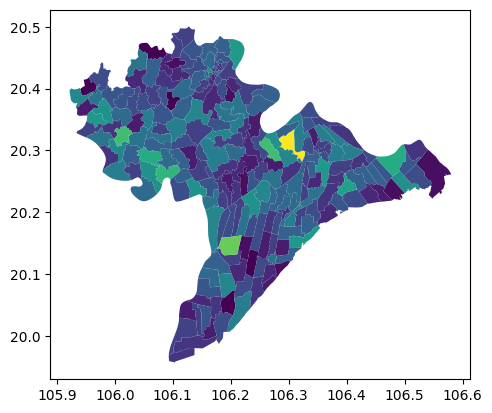

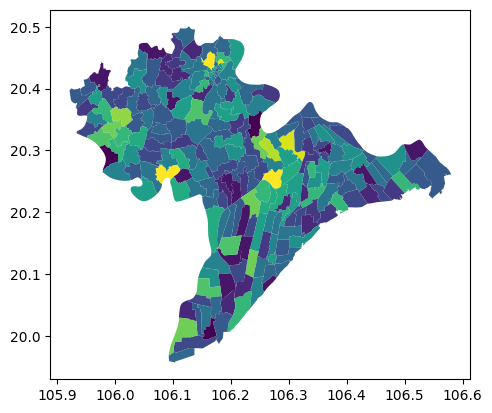

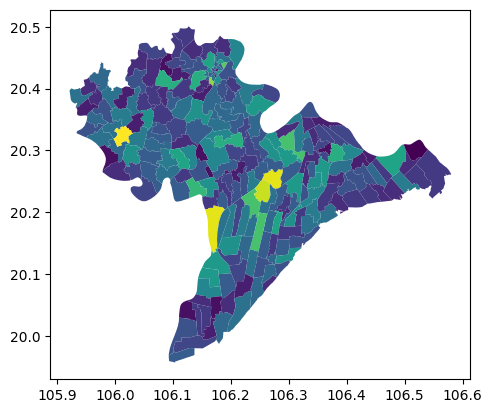

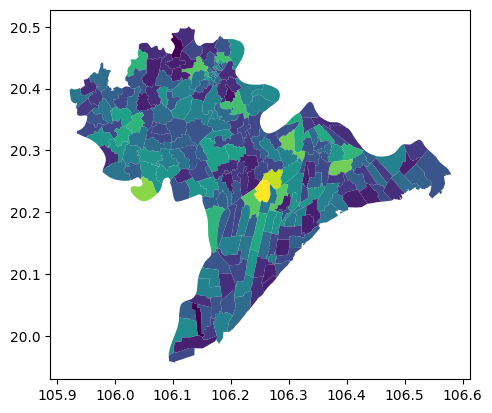

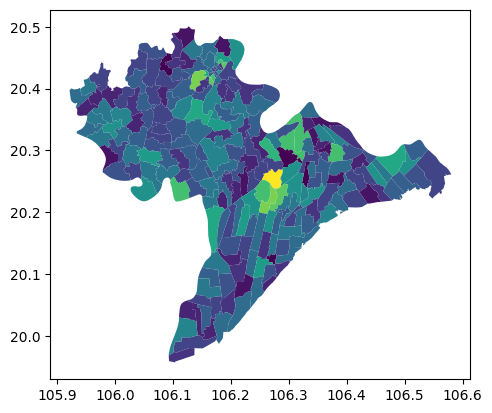

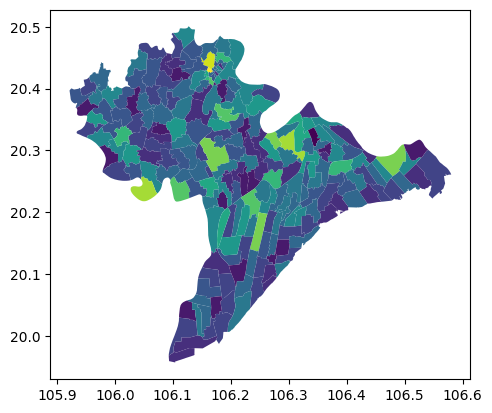

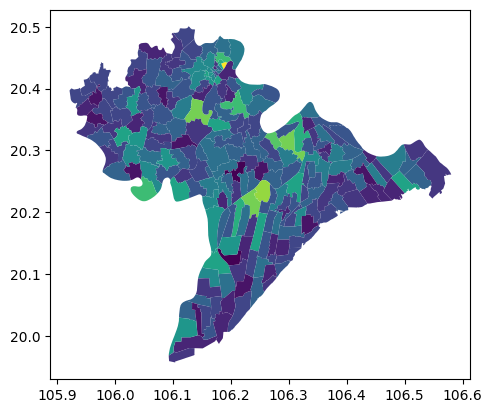

In [98]:
# Load GeoJSON file into a GeoDataFrame


# Define the bins for categorizing observed values
bins = [0, 5, 10, float('inf')]
labels = ['0-5', '6-10', '>10']

# Create a map for each year
years = gdf['year'].unique()

# Set up subplot grid
num_rows = len(years) // 2 + (len(years) % 2)
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 10))

# Plot each year's map
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    ax = axs[row, col] if num_rows > 1 else axs[col]
    
    # Filter data for the current year
    year_data = gdf[gdf['year'] == year]
    
    # Plot the data
    year_data.plot(column='observed')
    
    ax.set_title(f'Year {year}')
    ax.set_axis_off()

# Show the plot
plt.show()
